### About the dataset

A comprehensive investigation of a company's ideal clients is known as customer personality analysis. It allows a company to better understand its consumers and makes it simpler to change goods to meet the individual wants, habits, and concerns of various sorts of customers.


Customer personality analysis enables a company to change its product based on its target customers from various customer categories. Instead of paying money to promote a new product to every client in the firm's database, a company may determine which customer group is most likely to purchase the product and then market the product just to that segment.

The dataset cosists of:

**CUSTOMER INFO**
* ID: Customers unique id
* Year_Birth: Customers birth year
* Education: Education Qualification of customer
* Marital Status: Marital Status of customer
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customers last purchase

**PRODUCTS**
* MntWines: Amount spent on wine
* MntMeatProducts: Amount spent on meat products       
* MntFishProducts: Amount spent on fish products       
* MntSweetProducts: Amount spent on fish sweet products       
* MntGoldProds: Amount spent gold products     

**PLACE**
* NumDealsPurchases:    
* NumWebPurchases     
* NumCatalogPurchases 
* NumStorePurchases   
* NumWebVisitsMonth 

**PROMOTION**
* AcceptedCmp3       
* AcceptedCmp4    
* AcceptedCmp5      
* AcceptedCmp1
* AcceptedCmp2    
* Complain


* Z_CostContact    
* Z_Revenue        
* Response          


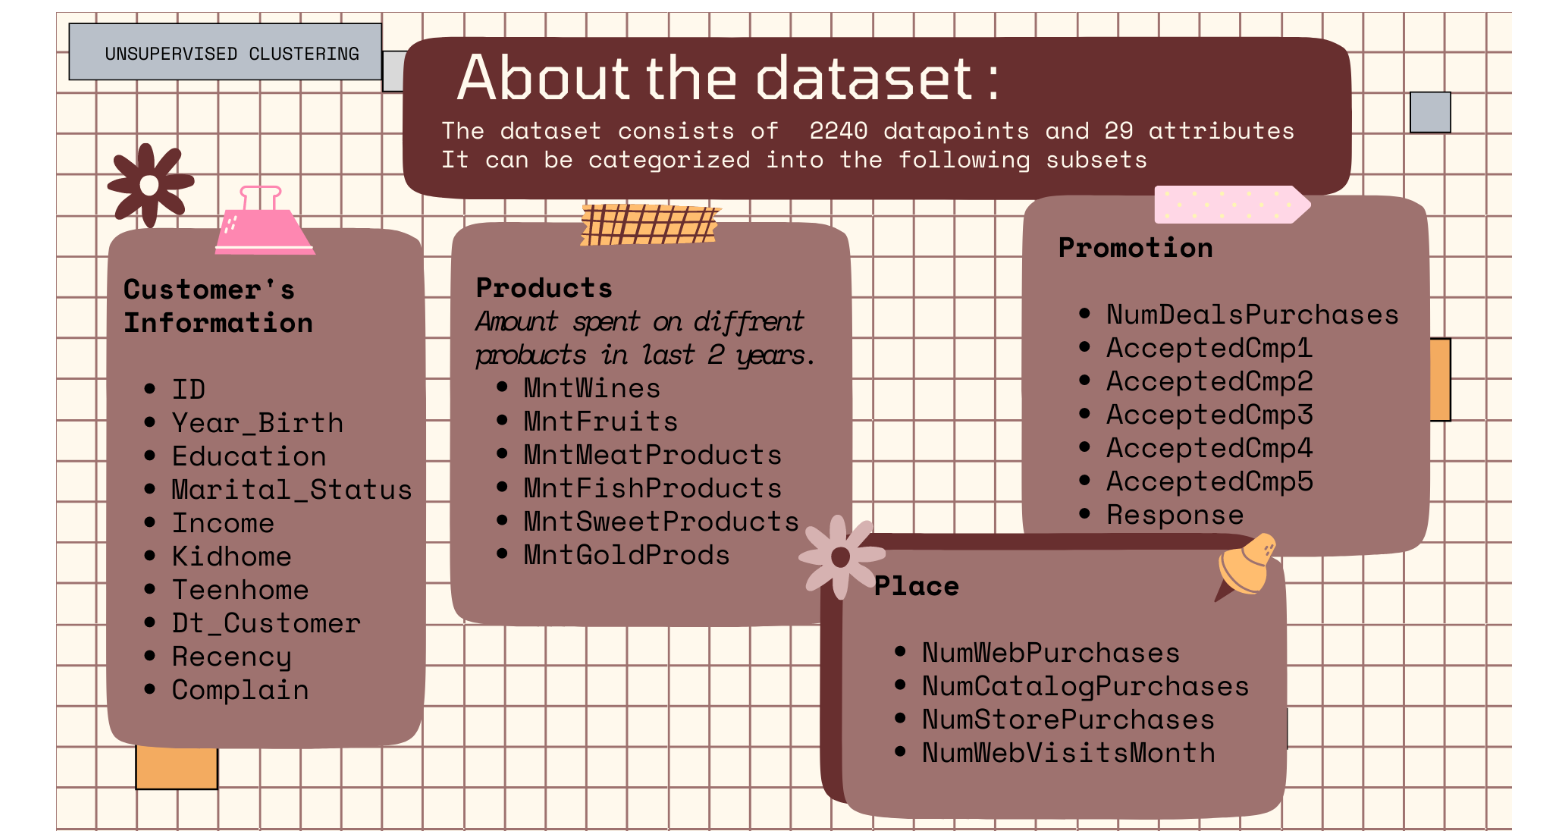

**In this project we will be performing an unsupervised clusteromg of data on the customers records from a groceries firms database.
Customer segmentation is the practise of separating customers into groups that reflect similarities among customers 
in each cluster. We will divide the cusotmers into segments to optimize tthe significance of each customer to the 
business. To modify products according to distinct needs and behavious of the customers. It also helps business to caterto the concerns if different types of customers.**

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)


In [2]:
data= pd.read_csv("marketing_campaign.csv", sep="\t")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
data.shape

(2240, 29)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

1. There are missing values in income 
2. Dt_Customer that indicates the date a customer ojoined the database is not parsed as a Datetime column
3. There are categorical variables indicated by the Object dtype in the above info() cell


In [5]:
#Remove the missing values
data= data.dropna()
print("The total number of data points after removing the rows with missing values are:",len(data))

The total number of data points after removing the rows with missing values are: 2216


Here we are going to create aa feature Dt_Customer that indicates the number of days the cusotmer is registered in the firms database.

In [6]:
data["Dt_Customer"]= pd.to_datetime(data["Dt_Customer"])
dates=[]

for i in data["Dt_Customer"]:
    i= i.date()
    dates.append(i)
    
    
print(" The newest customer enrollment date in the recoords is:", max(dates))
print(" The oldest customer enrollment date in the recoords is:", min(dates))


 The newest customer enrollment date in the recoords is: 2014-12-06
 The oldest customer enrollment date in the recoords is: 2012-01-08


Creating a feature "Customer for" of the number of days the cusotmer started to shop inthe store relative to
the last record date

In [7]:
days=[]
d1= max(dates)  #taking it to the newest customer

for i in dates:
    delta= d1-i
    days.append(delta)
    
data["Customer_For"]=days
data["Customer_For"]= pd.to_numeric(data["Customer_For"], errors="coerce")


Now we will be exploring the unique values in the categoeical columns to get a clear idea of the data

In [8]:
print("Total categories in the fature Marital_status:\n", data["Marital_Status"].value_counts(),"\n")
print("Total categories in the fature Education:\n", data["Education"].value_counts())

Total categories in the fature Marital_status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the fature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


### Feature Engineering
 1. Extract the **"Age"** of a customer by the "Year_Birth" indicating the birth year of the respective person.
 2. Create another feature **Spent** indicating the total amount spent by the customer in various categories over the span of two years.
 3. Create another feature **"Living_With"** out of **"Marital_Status"** to extract the living situation of couples.
 4. Create a feature **"Children"** to indicate total children in a household that is, kids and teenagers.
 5. To get further clarity of household, Creating feature indicating **"Family_Size"**
 6. Create a feature **"Is_Parent"** to indicate parenthood status
 7. Lastly, I will create three categories in the **"Education"** by simplifying its value counts.
 8. Dropping some of the redundant features

In [9]:
#feature engineering

#Age of customer today
data["Age"]= 2021- data["Year_Birth"]

#Total spending on various items
data["Spent"]= data["MntWines"]+  data["MntFruits"]+ data["MntMeatProducts"]+data["MntFishProducts"]+data["MntSweetProducts"]+ data["MntGoldProds"]


#Deriving living situation by Marital Status "Alone"
data["Living_With"]= data["Marital_Status"].replace({"Married":"Partner","Together":"Partner","Absurd":"Alone","Widow":"Alone", "Divorced":"Alone","Single":"Alone","YOLO":"Alone"})


#Feature for total children living in the household
data["Children"]= data["Kidhome"]+ data["Teenhome"]

#Feature for total members in the house
data["Living_With_bin"]= data["Living_With"].replace({"Alone":1,"Partner":2})##+data["Children"]
data["Family_Size"]= pd.to_numeric(data["Living_With_bin"])+ data["Children"]

#Feature pertaining parenthood
data["Is_Parent"]= np.where(data.Children> 0,1,0)

#Segmenting education levels in three groups
data["Education"]= data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
data=data.rename(columns= {"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID","Living_With_bin"]
data = data.drop(to_drop, axis=1)

In [10]:


#Lets haev a look at the new dataframe
data.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,83894400000000000,64,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,10800000000000000,67,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,40780800000000000,56,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,5616000000000000,37,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,27734400000000000,40,422,Partner,1,3,1


In [11]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,4.423735e+16,52.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,2.008532e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,25.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,2.937600e+16,44.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,4.432320e+16,51.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,5.927040e+16,62.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,9.184320e+16,128.000000,2525.000000,3.000000,5.000000,1.000000


The above stats shows some discrepencies in mean income & age and max income and age

Note that max age is 128, as this is calculated from toay ie 2023 and the data is old

I must take a look at the broader view of data.We will plot some selected features

<Figure size 800x550 with 0 Axes>

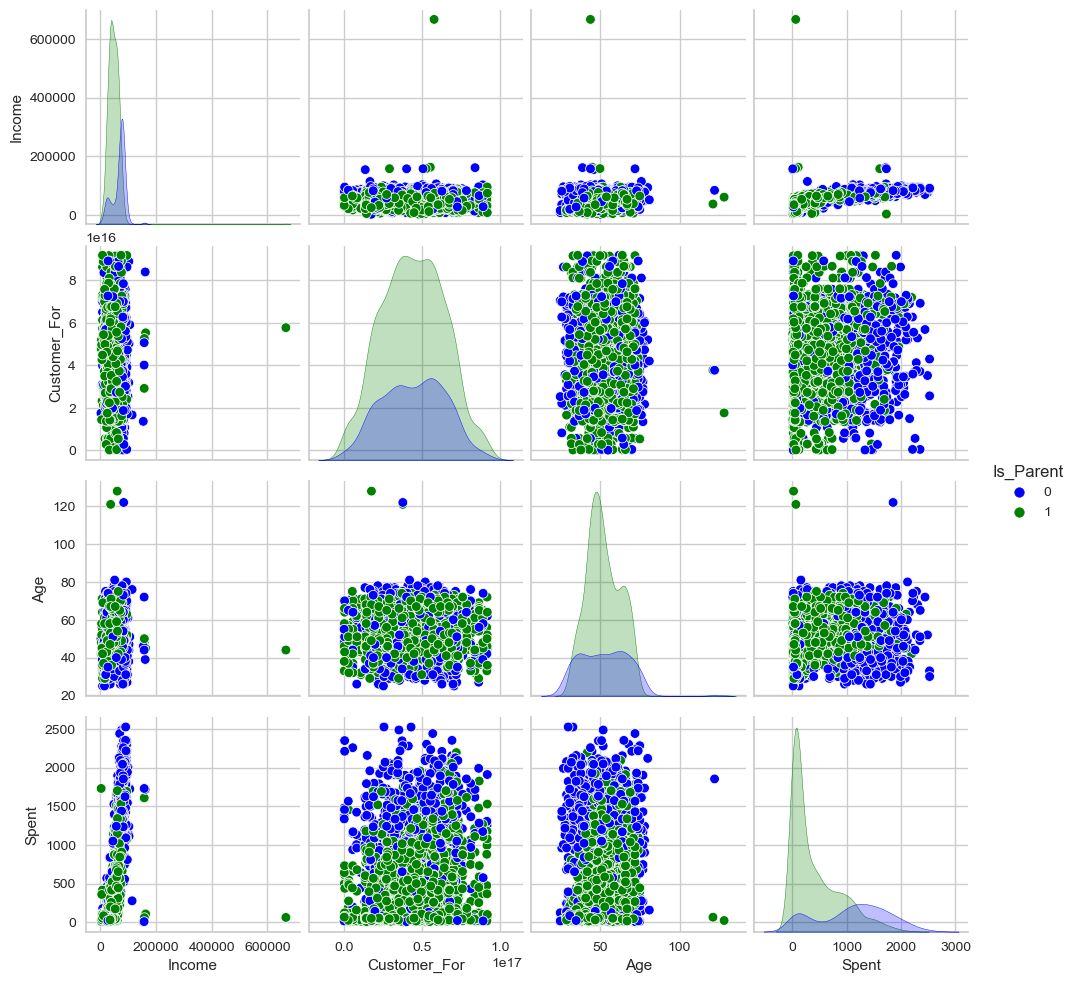

In [14]:
to_plot=["Income","Customer_For","Age","Spent","Is_Parent"]
plt.figure()
sns.pairplot(data[to_plot], hue="Is_Parent", palette=(["blue","green"]))
plt.show();

In [16]:
#Droping the outliers by setting a cap in Age and Income
data= data[data["Age"]<90]
data= data[data["Income"]<600000]
print("THe total number of daatapoint after removingthe outliers is:", len(data))

THe total number of daatapoint after removingthe outliers is: 2212


Next let is look at the correlation amongst the features (Excluding the categorical attributes at this point)

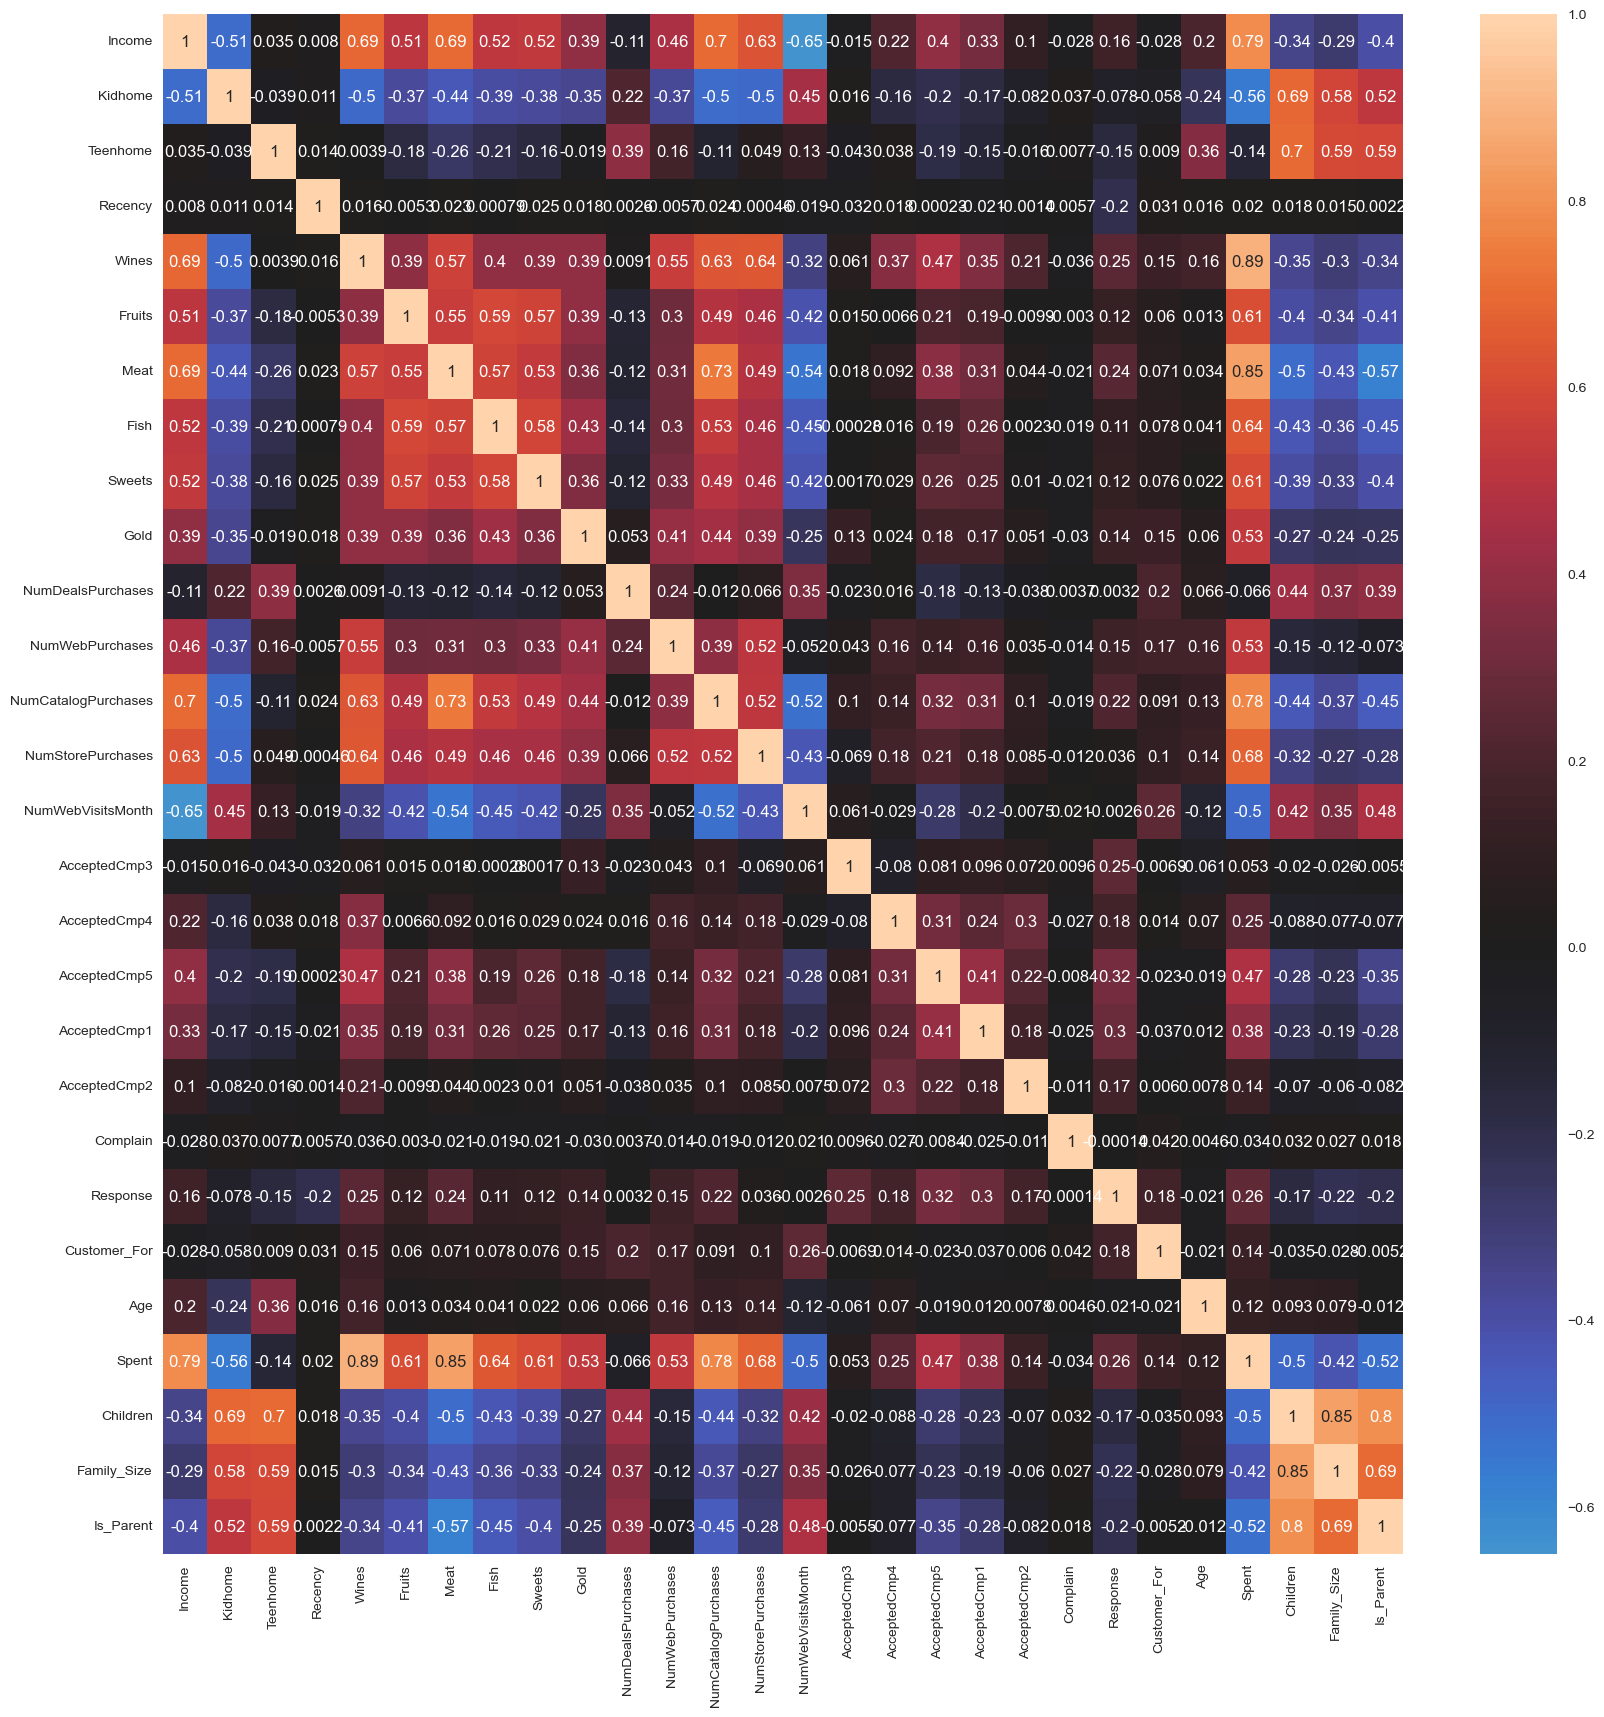

In [21]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat, annot=True, center=0);

### Data preprocessing

In this section , we will be preprocessing the data to perform clustering operations

The following stepsa re applied to preprocess the data:
 * label encode the categorical data
 * Scaling the features usin Standard Scaler
 * Creatibg subset dataframe for dimensionality reduction

In [24]:
# Get the list of categoricalk variables
object_cols= data.select_dtypes(include="object").columns.tolist()
print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [27]:
#Label encoding the object type
le= LabelEncoder()
for i in object_cols:
    data[i]= data[[i]].apply(le.fit_transform)
    
print("All featuresa are now numerical")

All featuresa are now numerical


#### Now we should create a copy of data since all the columns are numerical

In [30]:
#Creating a copy
ds= data.copy()

cols_del=['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']

ds=ds.drop(cols_del, axis=1)

#Scaling

sc=StandardScaler()
sc.fit(ds)
scaled_ds= pd.DataFrame(sc.transform(ds), columns= ds.columns)
print("All features are now scaled")

All features are now scaled


In [31]:
#Scaled data to be use for dimensionality reduction
print("Scaled and transformed dataframe:")
print(scaled_ds.head())

Scaled and transformed dataframe:
   Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0  -0.893586  0.287105 -0.822754 -0.929699  0.310353  0.977660  1.552041   
1  -0.893586 -0.260882  1.040021  0.908097 -0.380813 -0.872618 -0.637461   
2  -0.893586  0.913196 -0.822754 -0.929699 -0.795514  0.357935  0.570540   
3  -0.893586 -1.176114  1.040021 -0.929699 -0.795514 -0.872618 -0.561961   
4   0.571657  0.294307  1.040021 -0.929699  1.554453 -0.392257  0.419540   

       Meat      Fish    Sweets  ...  NumCatalogPurchases  NumStorePurchases  \
0  1.690293  2.453472  1.483713  ...             2.503607          -0.555814   
1 -0.718230 -0.651004 -0.634019  ...            -0.571340          -1.171160   
2 -0.178542  1.339513 -0.147184  ...            -0.229679           1.290224   
3 -0.655787 -0.504911 -0.585335  ...            -0.913000          -0.555814   
4 -0.218684  0.152508 -0.001133  ...             0.111982           0.059532   

   NumWebVisitsMonth  Custom

## Dimensionality Reduction

There are many factors on the basis of which the final classification will be done. These factor are basically attributes or features.
The higher the number of features, the harder it is to work with it. Many of these features are correlated and hence, redundant.

This is why we will be performing dimensionality reductions on the selected features before putting them through the classifier.

Steps in this section:
* Dimensinality reduciton for n=3
* Plotting the reduced dataframe
                         

In [34]:
# Initiating the PCA to reduce dimensions aka features to 3.

pca= PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds= pd.DataFrame(pca.transform(scaled_ds), columns=["col1",'col2','col3'])
PCA_ds.describe().T


,count,mean,std,min,25%,50%,75%,max
col1,2212.0,8.833601e-18,2.878377,-5.969394,-2.538494,-0.780421,2.383290,7.444305
col2,2212.0,1.666338e-17,1.706839,-4.312193,-1.328326,-0.158125,1.242290,6.142738
col3,2212.0,3.837095e-17,1.221957,-3.530698,-0.828826,-0.022038,0.799429,6.615308


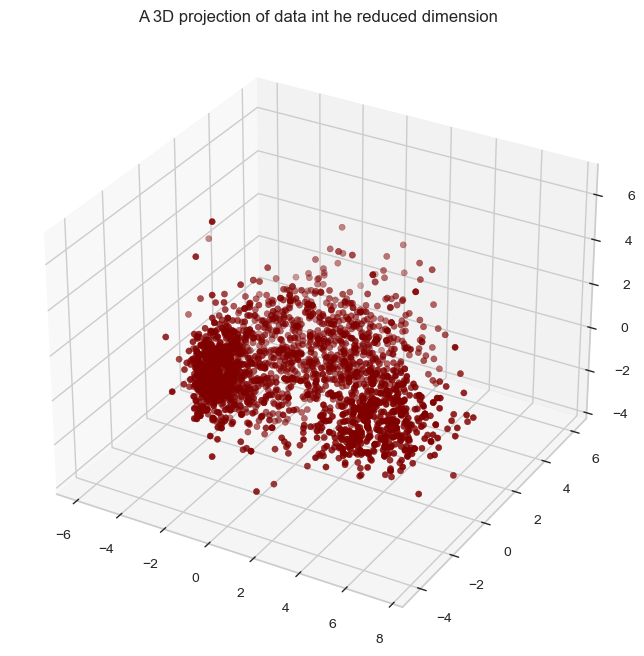

In [39]:
# This is a 3D projectino of data in the reduced dimension
x= PCA_ds["col1"]
y= PCA_ds["col2"]
z= PCA_ds["col3"]

#Plotting
fig= plt.figure(figsize=(10,8))
ax= fig.add_subplot(111,projection="3d")
ax.scatter(x,y,z,c="maroon", marker="o")
ax.set_title("A 3D projection of data int he reduced dimension")
plt.show();



## Clustering 

After reducing the attributes to three dimensions. We will be performing clustering.Aggloimerative clustering is a
heirarchical clustering method. it invoolves merging examples until thje desired number of clusters is achieved.'

##### Steps involved in clustering
* Elbow method to determine hte number of clusters to be formed.
* Clustering via agglomerative method
* Examining the clusters formed via scatter plot

Elbow mehod to determining the number of clusters formed


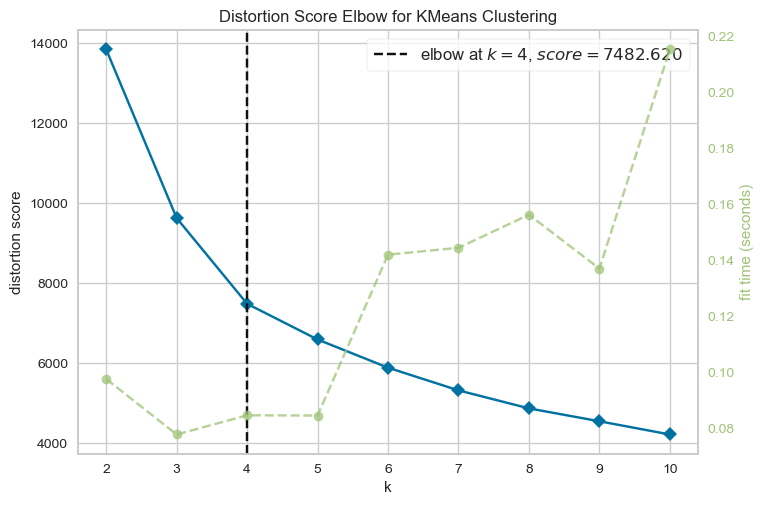

In [41]:
# Examining via elbow method
print("Elbow mehod to determining the number of clusters formed")
Elbow_M= KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show();

The above slide shows that four will be an optimal number of clusters for this data, Next, we will be fitting the Agglomerative CLustering Model to get the final clusters.


In [43]:
#iIntitiating the Agglomerative Clustering model
AC= AgglomerativeClustering(n_clusters=4)

#Fit the model
yhat_AC= AC.fit_predict(PCA_ds)
PCA_ds["Clusters"]= yhat_AC

#Adding cluster features to the original dataframe
data['Clusters']= yhat_AC

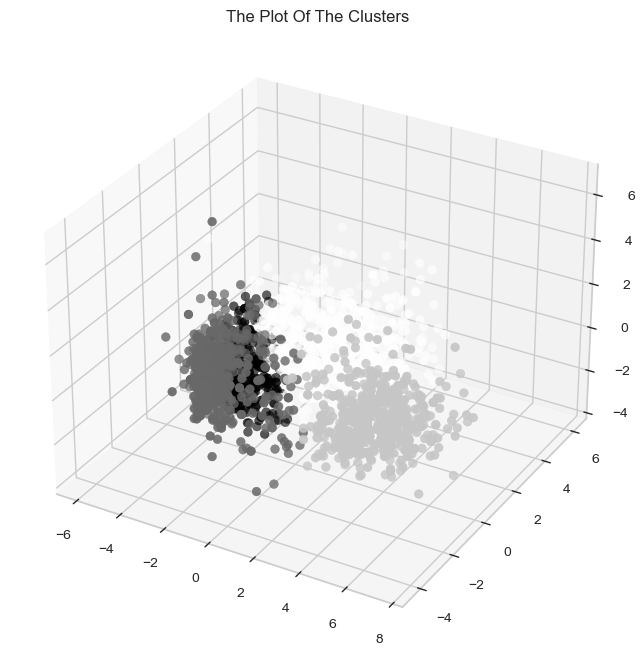

In [45]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o' )
ax.set_title("The Plot Of The Clusters")
plt.show()


## Evaluating model

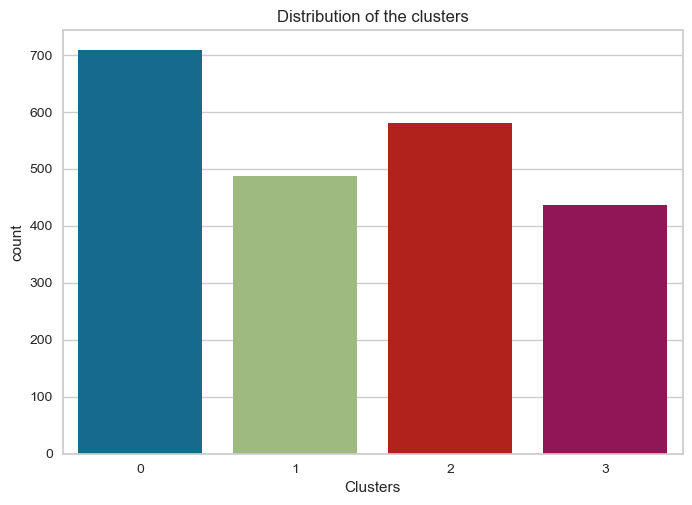

In [47]:
#Lets havea a look at the group disribution of clustering

pl= sns.countplot(x= data["Clusters"])
pl.set_title("Distribution of the clusters")
plt.show();

The clusters seems to be distributed evenly

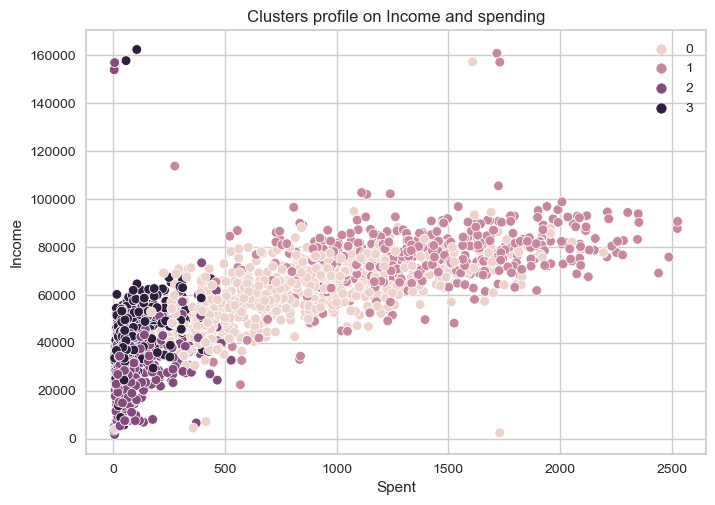

In [49]:
pl= sns.scatterplot(data= data, x=data["Spent"], y=data["Income"], hue= data["Clusters"])
pl.set_title("Clusters profile on Income and spending")
plt.legend()
plt.show();

**Income Vs Spending plot show the following clusters**

* group 0: high spending & average income
* group 1: high spending & high income
* group 2: low spending & low income
* group 3: low spending & average income

In [60]:
income_means=data.groupby("Clusters")["Income"].mean().reset_index()
income_means

,Clusters,Income
0,0,60052.556497
1,1,75714.743326
2,2,29956.565517
3,3,41573.892449


In [59]:
spending_means=data.groupby("Clusters")["Spent"].mean().reset_index()
spending_means

,Clusters,Spent
0,0,802.035311
1,1,1385.016427
2,2,98.981034
3,3,99.597254


In [64]:
merged_df=income_means.merge(spending_means, on="Clusters", how ="inner" )
print(merged_df)

   Clusters        Income        Spent
0         0  60052.556497   802.035311
1         1  75714.743326  1385.016427
2         2  29956.565517    98.981034
3         3  41573.892449    99.597254


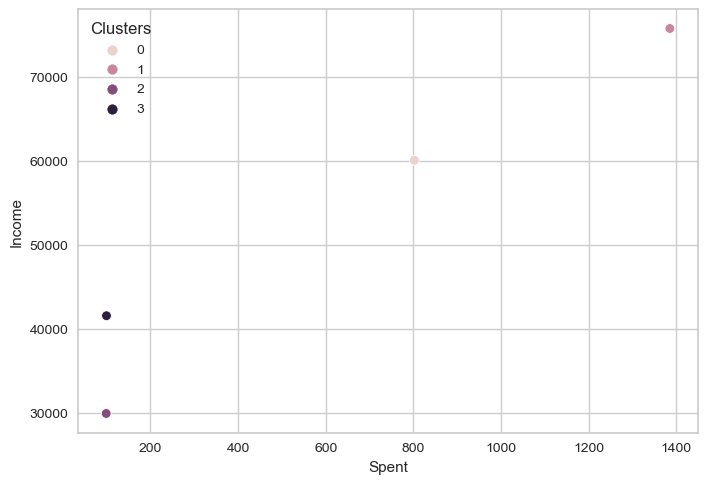

In [63]:
#Plot the means of all the clusters fror spending and income
plt.figure()
sns.scatterplot(merged_df,x='Spent', y='Income', hue="Clusters")
plt.show()

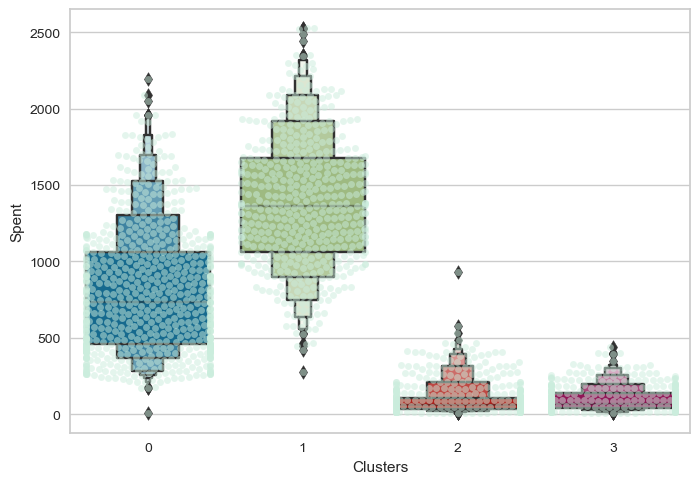

In [67]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Spent"], )
plt.show()

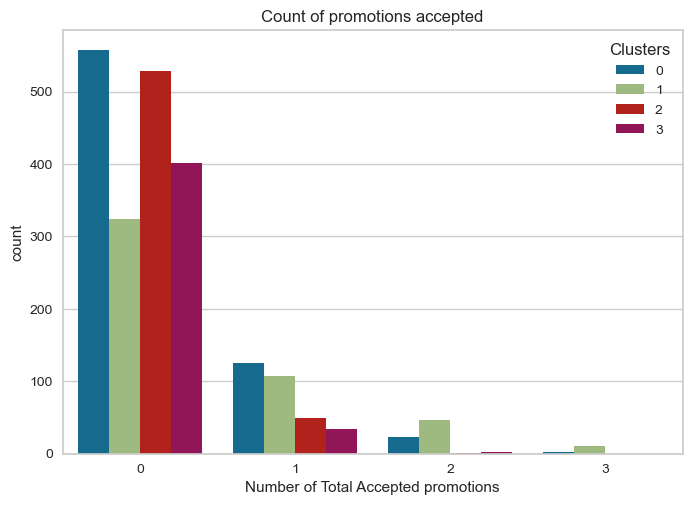

In [70]:
#Let us now wxplore how our campaigns did in the past

#AccpetedCmp1,AccpetedCmp1,AccpetedCmp2,AccpetedCmp3, AccpetedCmp4 and AccpetedCmp5 are removed from ds but the main dataframe 
# "data" still contains these columns
data["Total_Promos"]= data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"] + data["AcceptedCmp4"]
+ data["AcceptedCmp5"]

#ploting count of total campaigns accepted

plt.figure()
pl= sns.countplot(data= data, x= data["Total_Promos"], hue= data["Clusters"] )
pl.set_title("Count of promotions accepted")
pl.set_xlabel("Number of Total Accepted promotions")
plt.show()

#### In the above Viz 
X axis: Total number of accepted promotions

y-axis: Count of number of people 
    
We observet that nost people dont accept campaigns as max people belong to 0 number of accepted promotionsm

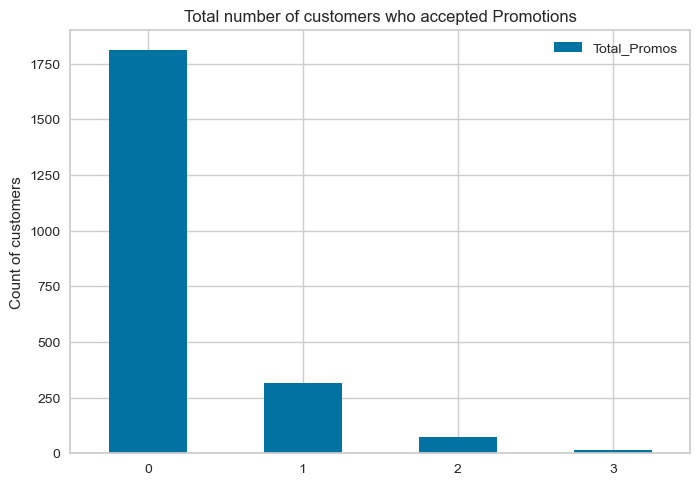

In [86]:
ax=data.Total_Promos.value_counts().to_frame().plot.bar(rot=0);
ax.set_ylabel("Count of customers")
ax.set_title("Total number of customers who accepted Promotions");

In [89]:
pd.crosstab(data.Clusters, data.Education)

Education,0,1,2
Clusters,,,
0,369,291,48
1,253,189,45
2,285,174,121
3,208,191,38


## Profiling 

After forming clusters and looking at purchase clusters. Now we will profile customers and come to some consclusions about who is our star customer and who needs more attention from the marketing team.

We will plot some of the featuers that are indicative of the customers personal traits in light of the cluster they are in.

<Figure size 800x550 with 0 Axes>

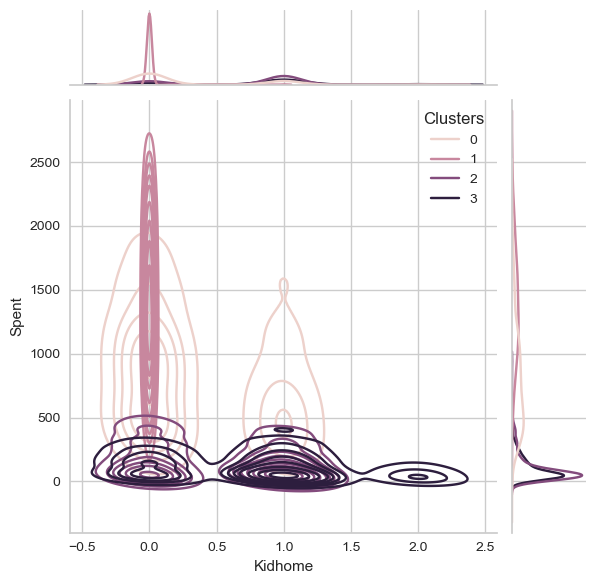

<Figure size 800x550 with 0 Axes>

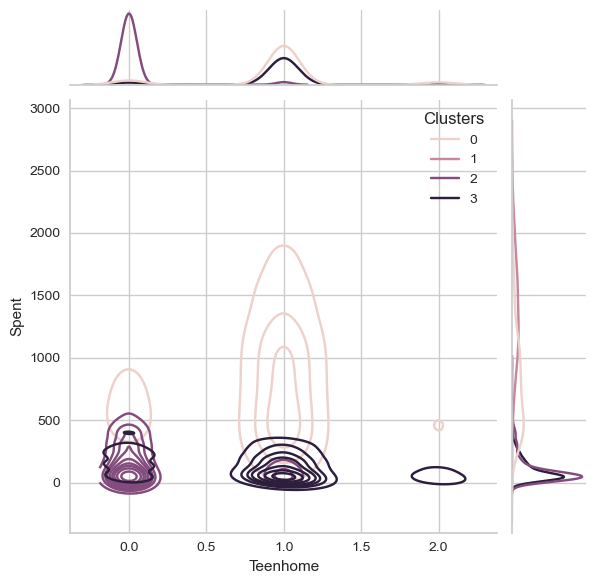

<Figure size 800x550 with 0 Axes>

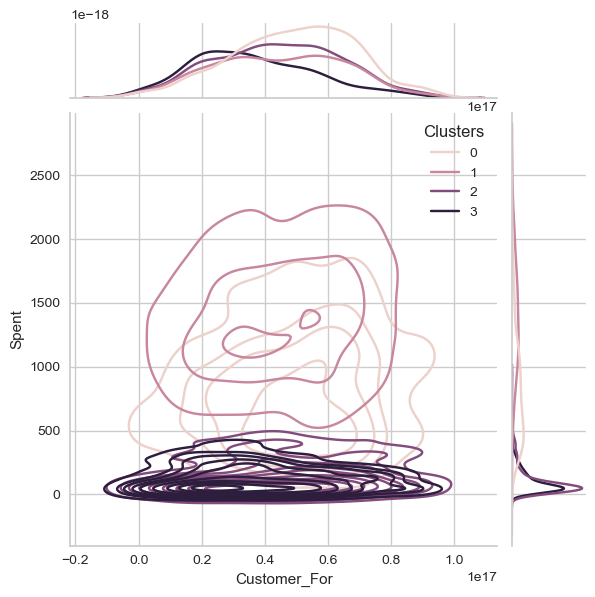

<Figure size 800x550 with 0 Axes>

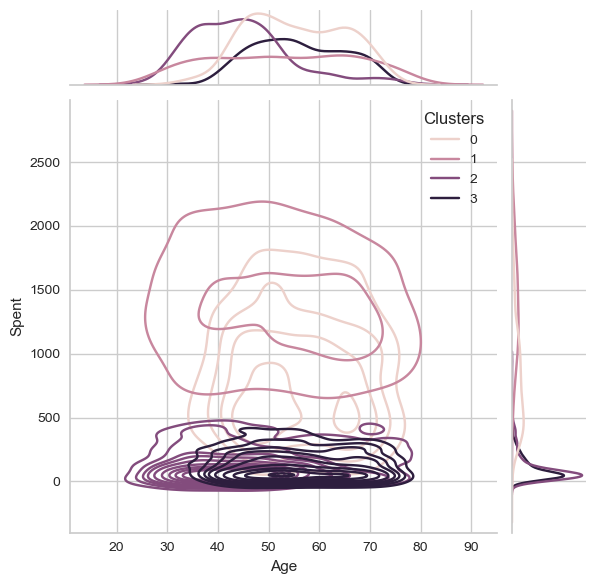

<Figure size 800x550 with 0 Axes>

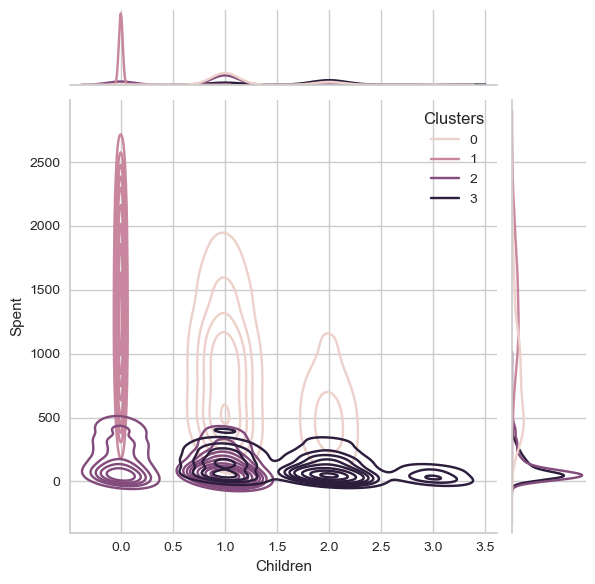

<Figure size 800x550 with 0 Axes>

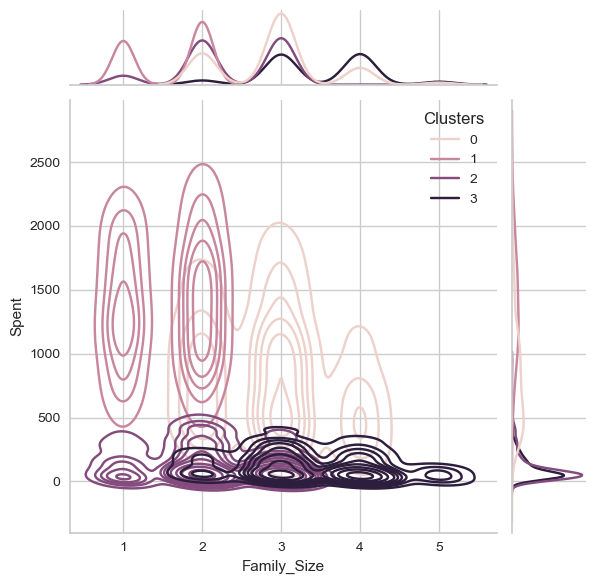

<Figure size 800x550 with 0 Axes>

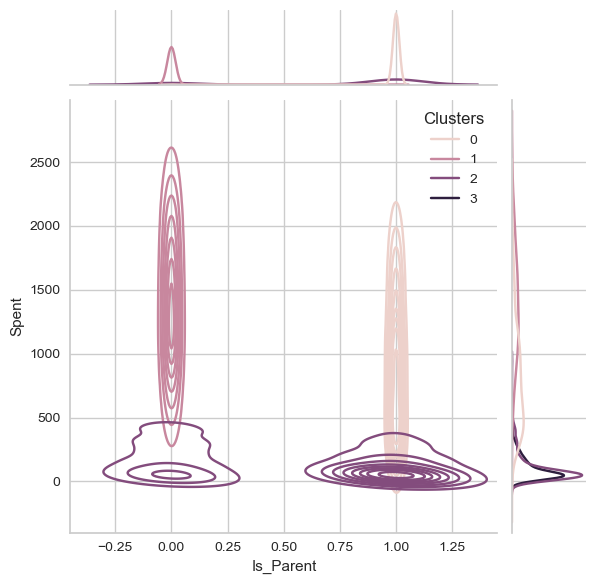

<Figure size 800x550 with 0 Axes>

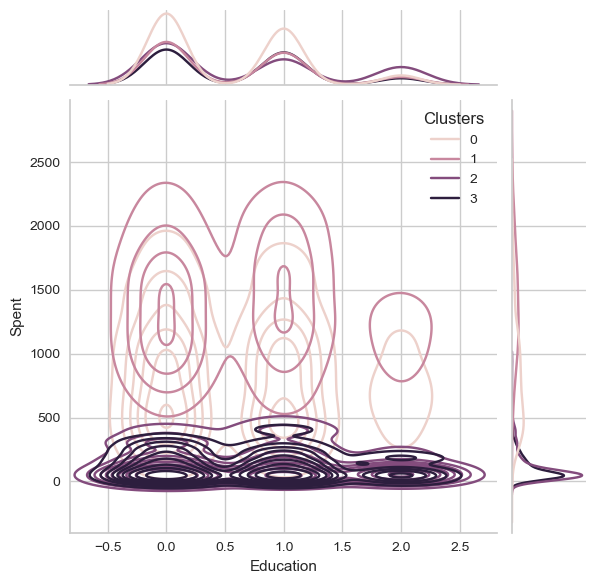

<Figure size 800x550 with 0 Axes>

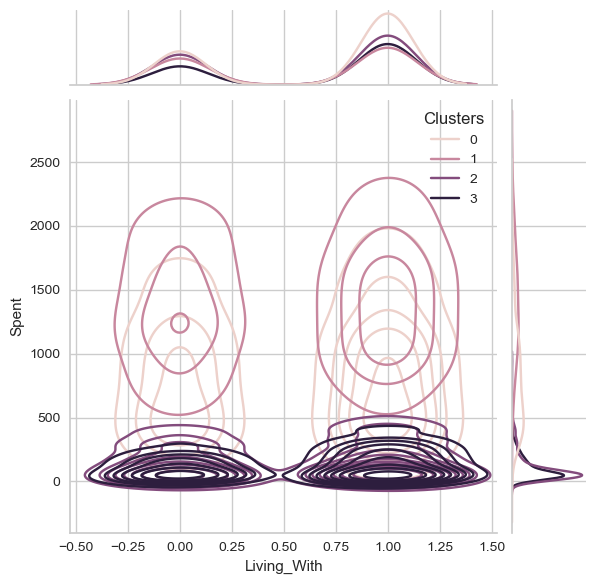

In [94]:
Personal=["Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x= data[i], y= data["Spent"], hue= data["Clusters"], kind="kde")
    plt.show()

### On Profiling Customers the following conclusions can be drawn

**About Cluster Number 0** 
* Are a definitely parent.
* Relatively older
* Single parents are a subset of this group
* Most have a teenager at home

**About Cluster NUmber 1**
* Are a definitel not a parent
* At the max are only 2 members in the family
* A slight majrity of couples over single people
* A high income group

**About  Cluster Number 2**
* The majority of these people are parents
* At the max are 3 members in the family
* Relatively younger

**About Cluster Number 3**
* They are definitely a parent
* Relatively older
* A lower income group

In [97]:
data.columns























Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Customer_For',
       'Age', 'Spent', 'Living_With', 'Children', 'Family_Size', 'Is_Parent',
       'Clusters', 'Total_Promos'],
      dtype='object')